<a href="https://colab.research.google.com/github/mayorofdata/Breast-Cancer-Classification-using-Support-Vector-Machine/blob/main/Breast_Cancer_Classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background Statement

Breast cancer is the most common cancer in women worldwide and the second most common cancer overall. It is a leading cause of cancer death in less developed countries and the second leading cause of cancer death in American women, exceeded only by lung cancer. In 2018, nearly 2 million new breast cancer cases were diagnosed. It is the most frequently diagnosed cancer among women in 140 of 184 countries worldwide.

Globally, breast cancer now represents one in four of all cancers in women. Since 2008, worldwide breast cancer incidence has increased by more than 20 percent. Mortality has increased by 14 percent. ​According to the World Cancer Research Fund International, Breast Cancer is the most common cancer for women in the U.S after skin cancer.  In the U.S. in 2020, it is estimated that 42,690 breast cancer deaths (42,170 women, 520 men) will occur.

Source: https://www.bcrf.org


It is estimated that in 2020:

- 27,400 women will be diagnosed with breast cancer. This represents 25% of all new cancer cases in women in 2020.
- 5,100 women will die from breast cancer. This represents 13% of all cancer deaths in women in 2020.
- On average, 75 Canadian women will be diagnosed with breast cancer every day.
- On average, 14 Canadian women will die from breast cancer every day.
- 40 men will be diagnosed with breast cancer and 55 will die from breast cancer.

Source: https://www.cancer.ca/en/cancer-information/cancer-type/breast/statistics/?region=on

# Problem Statement
The key challenge in cancer detection is how to classify tumors into malignant or benign using machine learning. Early diagnosis can significantly increases the chances of survival of Breast cancer patient. Machine learning techniques can dramatically improves the accuracy of diagnosis. Research indicates that most experienced physicians can diagnose cancer with 79 percent accuracy while 91 percent correct diagnosis is achieved using machine learning techniques.


In this case study, the task is to classify tumors into malignant or benign tumors using features from several cell images. 30 features are used, examples:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
    - Malignant
    - Benign


https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

The following steps are followed for the data analysis and Prediction:
- Step 1: Import Libraries and datasets
- Step 2: EDA - Explore/Visualize Dataset
- Step 3: Prepare the data for training
- Step 4: Model Training 
- Step 5: Model Testing
- Step 6: Model Accuracy
- Step 7: Further Improvement of Model

![](https://drive.google.com/uc?export=view&id=1tOfzYBIleeJWS5BmKRkvSIgiqjsgQZmL)

# The model is created using Support Vector Machine
- A Support Vector Machine is a supervised algorithm that can classify cases by finding a separator.

- SVM works by mapping data to a high-dimensional feature space so that data points can be categorized,
even when the data are not otherwise linearly separable.
Then, a separator is estimated for the data.
The data should be transformed in such a way that a separator could be drawn as a hyperplane.

- Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as: Linear, Polynomial, Radial basis function (or RBF), and Sigmoid.

- Each of these functions has its own characteristics, its pros and cons, and its equation, but the
good news is that you don’t need to know them, as most of them are already implemented in libraries of data science programming languages.

- The hyperplane is learned from training data using an optimization procedure that maximizes the margin; and like many other problems, this optimization problem can also be solved by gradient descent. You can make classifications using this estimated line. It is enough to plug in input values into the line equation, then, you can calculate whether an unknown point is above or below the line.
- If the equation returns a value greater than 0, then the point belongs to the first class, which is above the line, and vice versa.
- The two main advantages of support vector machines are that they’re accurate in high dimensional spaces; and, they use a subset of training points in the decision function (called support vectors), so it’s also memory efficient.
- The disadvantages of support vector machines include the fact that the algorithm is prone for over-fitting, if the number of features is much greater than the number of samples. Also, SVMs do not directly provide probability estimates, which are desirable in most classification
problems. In addition, SVMs are not very efficient computationally, if your dataset is very big, such as when
you have more than one thousand rows.
- SVM is good for image analysis tasks, such as image classification and handwritten digit recognition. Also SVM is very effective in text-mining tasks, particularly due to its effectiveness in dealing with high-dimensional data. For example, it is used for detecting spam, text category assignment, and sentiment analysis. Another application of SVM is in Gene Expression data classification, again, because of its power in high dimensional data classification. SVM can also be used for other types of machine learning problems, such as regression, outlier detection, and clustering.

![](https://drive.google.com/uc?export=view&id=1CDetS2GBWAx6mNaqQMDXos7EnvfvGB6w)


# Step #1: Import Libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer= load_breast_cancer()

In [5]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
print(cancer['target_names'])

['malignant' 'benign']


In [10]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
cancer['data'].shape

(569, 30)

In [12]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [13]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# Step #2: EDA - Explore/Visualize Dataset

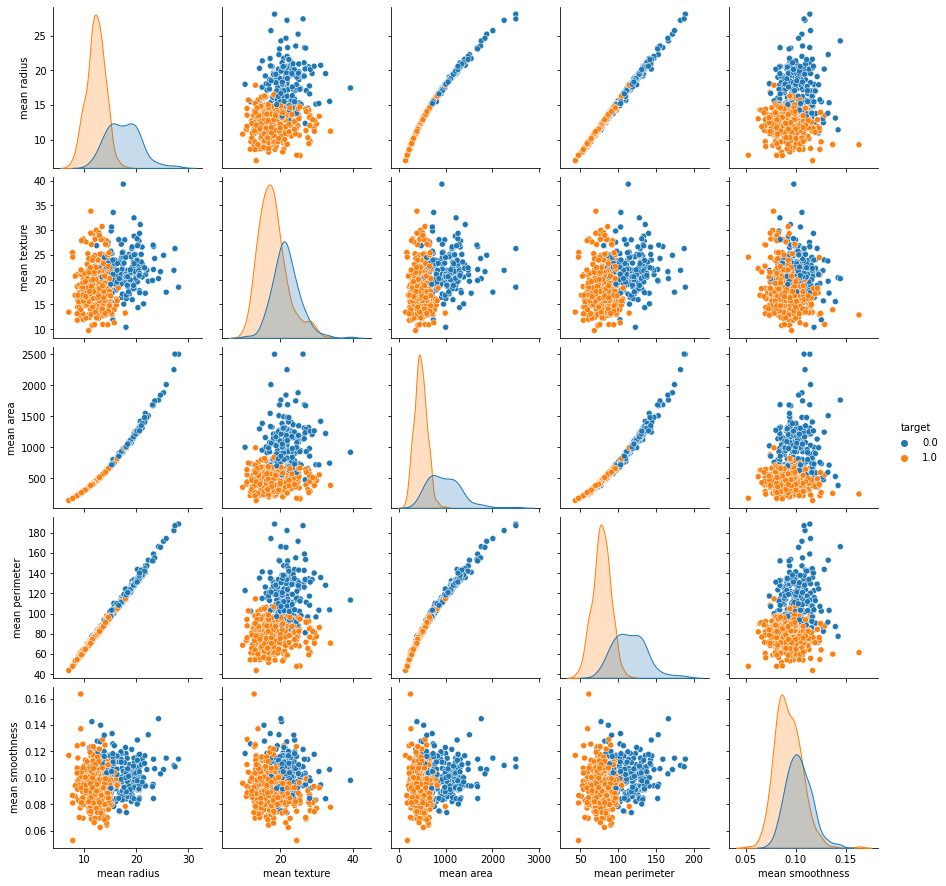

In [15]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


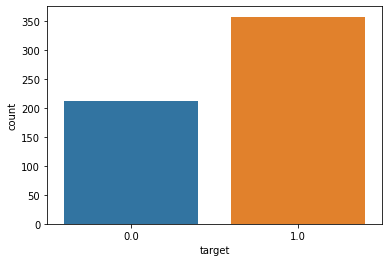

In [16]:
sns.countplot(df_cancer['target'])

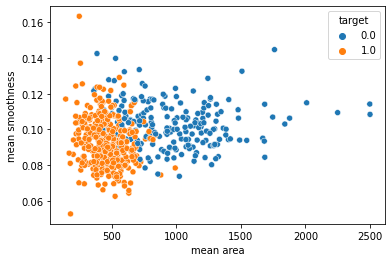

In [17]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target',data=df_cancer)

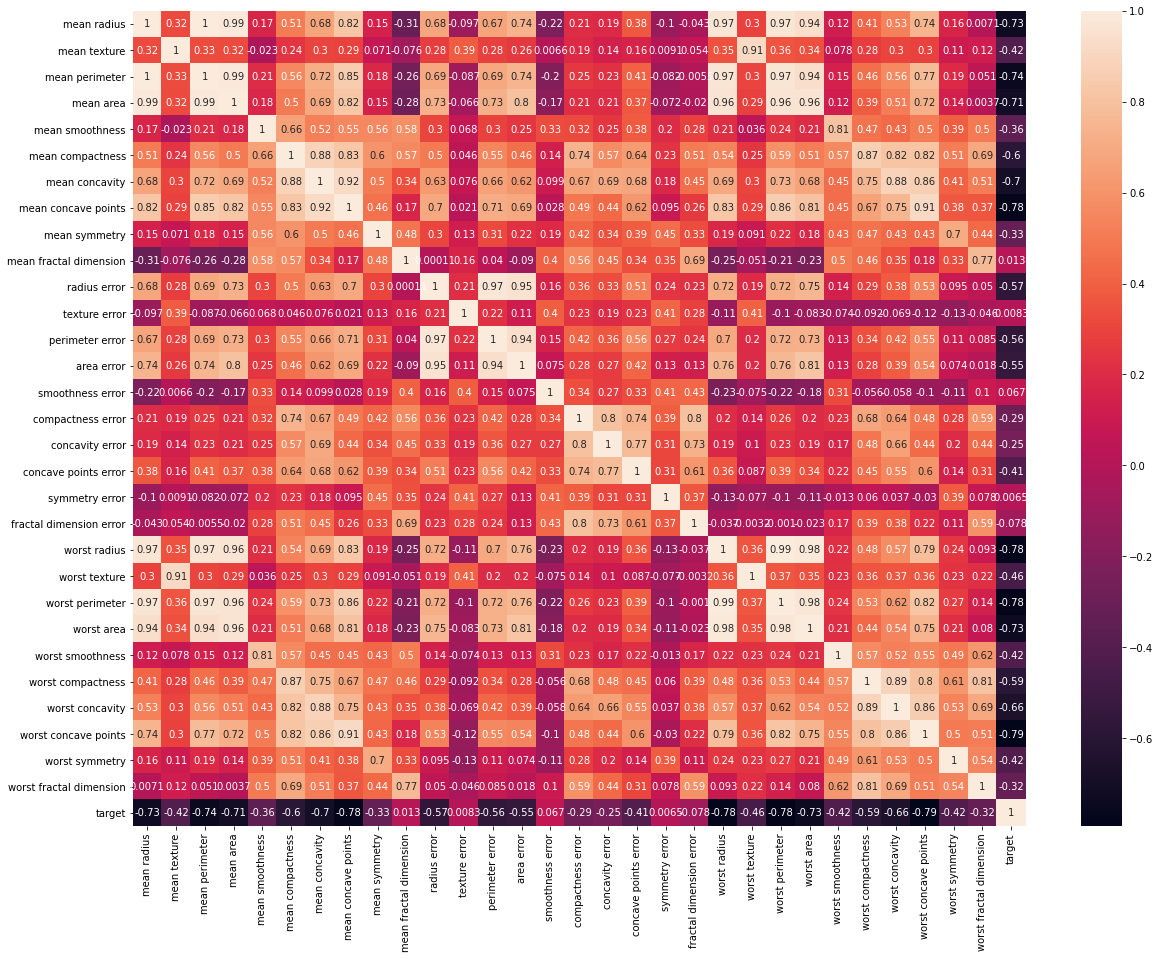

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(), annot=True)

# Step #3: Prepare the data for training

In [19]:
#Let's drop the target coloumn before we do train test split
X = df_cancer.drop(['target'], axis=1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

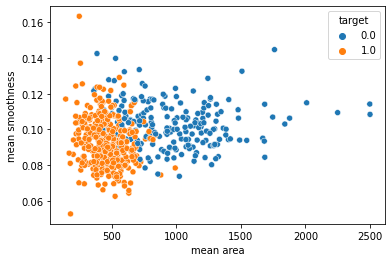

In [37]:
min_X = X.min()
range_X = (X-min_X).max()
X_scaled = (X - min_X)/range_X
sns.scatterplot(x= X['mean area'], y=X['mean smoothness'], hue= y )

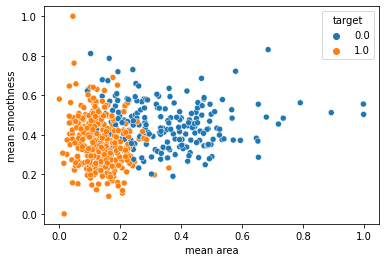

In [38]:
sns.scatterplot(x= X_scaled['mean area'], y=X_scaled['mean smoothness'], hue= y )

# Step #4: Model Training (Finding a Problem Solution)

In [39]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

In [40]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
373,0.646457,0.258370,0.628913,0.505408,0.377629,0.270597,0.357779,0.444384,0.258081,0.101516,0.181858,0.065705,0.158413,0.131151,0.152905,0.125409,0.067702,0.233378,0.068638,0.028198,0.620420,0.297175,0.579660,0.432757,0.561514,0.269921,0.332188,0.725773,0.221565,0.101732
289,0.207724,0.310450,0.196116,0.107105,0.311456,0.094166,0.056209,0.108002,0.481313,0.201980,0.055803,0.356657,0.056401,0.019963,0.164021,0.087857,0.034747,0.187990,0.369759,0.070243,0.157595,0.376333,0.143832,0.067366,0.268309,0.067711,0.060136,0.213162,0.335502,0.097731
208,0.290075,0.433886,0.298735,0.163690,0.429448,0.395436,0.203960,0.253579,0.398990,0.487363,0.029549,0.124226,0.034585,0.015480,0.120271,0.211479,0.063788,0.157303,0.242838,0.114119,0.235503,0.456823,0.244385,0.111605,0.420855,0.400607,0.252556,0.386942,0.505224,0.344746
504,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.227976,0.261034,0.665657,0.949031,0.107224,0.161952,0.106347,0.024726,0.274331,0.324211,0.087955,0.414472,0.246778,0.330113,0.083600,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290361,0.460186
499,0.644091,0.389922,0.649644,0.499046,0.504378,0.444819,0.512652,0.557157,0.397980,0.258214,0.173420,0.189135,0.162512,0.127546,0.168372,0.192703,0.102576,0.280167,0.046266,0.097847,0.566702,0.499467,0.561731,0.387043,0.496797,0.322506,0.413658,0.726117,0.180367,0.229240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,0.070541,0.141841,0.077699,0.032720,0.136588,0.246102,0.089722,0.232241,0.190634,0.098607,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
73,0.322732,0.205614,0.322300,0.186893,0.433962,0.333170,0.182498,0.251938,0.304040,0.330666,0.060547,0.057527,0.056542,0.030908,0.102118,0.138177,0.044419,0.174389,0.060759,0.077222,0.307364,0.235608,0.298272,0.154149,0.461798,0.317170,0.221965,0.475258,0.201853,0.314574
400,0.517251,0.382482,0.557045,0.360764,0.635280,0.730691,0.747188,0.595427,0.531818,0.446293,0.105559,0.091606,0.111483,0.064827,0.185131,0.262325,0.155682,0.199091,0.112962,0.145247,0.457844,0.420043,0.493999,0.274971,0.766889,0.547593,0.721565,0.674914,0.331165,0.424767
118,0.416442,0.446398,0.427821,0.271092,0.567572,0.477946,0.499766,0.471123,0.523232,0.491786,0.159515,0.157311,0.133864,0.096803,0.237482,0.281702,0.150253,0.263307,0.099454,0.175822,0.436144,0.492537,0.397878,0.267106,0.755002,0.451349,0.587540,0.698969,0.336882,0.460186


In [41]:
y_train

373    0.0
289    1.0
208    1.0
504    1.0
499    0.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 426, dtype: float64

In [42]:
# Fitting Support Vector Machine to the Training set
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Step #5: Model Testing

In [46]:
y_predict = svc_model.predict(X_test)
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1.])

In [47]:
y_test

28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
      ... 
494    1.0
316    1.0
523    1.0
90     1.0
469    1.0
Name: target, Length: 143, dtype: float64

# Step #6: Model Evaluation

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 

It allows the visualization of the performance of an algorithm.

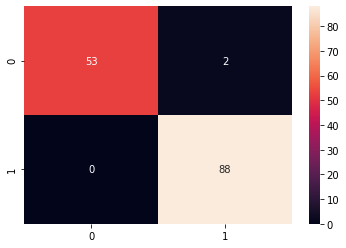

In [48]:
# Checking the accuracy of classifier using confusion matrix.
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        55
         1.0       0.98      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



From the result, the ML model made prediction with accuracy of 99 percent. From the confusion matrix, the model correctly classify 53 points for malignant and 66 points for benign.

The model also misclassified only two samples. The key factor to considered here is that the misclassification was actually when the prediction was zero (malignant), however the target class was one (benign). This is called a type 1 error.

# Step #7: Further improvement of Model


In [53]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [56]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.988, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [57]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, grid_predictions)

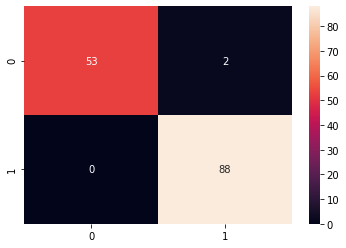

In [61]:
sns.heatmap(cm, annot=True)

# Conclusion
Machine learning techniques(SVM) was able to classify tumors effectively into malignant and benign tumors with 99 percent accuracy. The technique can rapidly evaluate breast masses and classify them in an automated fashion.

Early breast cancer detection can dramatically save lives especially in the developing world. This technique can further improved by combining computer vision and machine learning and deep learning techniques to classify cancer directly using tissue images.

